# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3884587a37f3f5db9283ac636439d208d2ee40f926202aa7fb9f96182af85786
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Чтобы получать одни и теже результаты при проверке

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [5]:
df_train.sample(10)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

In [6]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [7]:
df_test.tail(5)

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [8]:
print(df_train.columns[df_train.isnull().any()].tolist())

['mileage', 'engine', 'max_power', 'torque', 'seats']


In [9]:
df_train.duplicated().sum()

985

In [10]:
from ydata_profiling import ProfileReport

ProfileReport(df_train, title="Data Profile Report", explorative=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [11]:
duples_train = df_train.drop(columns=["selling_price"])
print('Дубликатов:',duples_train.duplicated().sum())

Дубликатов: 1159


In [12]:
duples_train[duples_train.duplicated(keep=False)]

name  year  km_driven    fuel  \
22                     Maruti Baleno Delta 1.2  2016      45000  Petrol   
26                 Maruti Omni E MPI STD BS IV  2018      25000  Petrol   
27             Maruti Vitara Brezza LDi Option  2017      70000  Diesel   
28                          Fiat Palio 1.2 ELX  2003      50000  Petrol   
29                   Maruti Omni 8 Seater BSIV  2012      35000  Petrol   
...                                        ...   ...        ...     ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6989                    Maruti Swift Dzire VDI  2015      50000  Diesel   
6997                           Tata Indigo CR4  2013      25000  Diesel   
6998                           Tata Indigo CR4  2013      25000  Diesel   

     seller_type transmission         owner     mileage   engine  max_power  \
22    Individual       Manual   First Owner   21.4 kmpl  1197 CC   83.1 bhp   
26    Individual       Manual   First Owner   16.8 kmpl   796 CC   34.2 bhp   
27    Individual       Manual   First Owner   24.3 kmpl  1248 CC   88.5 bhp   
28    Individual       Manual  Second Owner         NaN      NaN        NaN   
29    Individual       Manual  Second Owner   14.0 kmpl   796 CC     35 bhp   
...          ...          ...           ...         ...      ...        ...   
6981  Individual       Manual   First Owner   24.4 kmpl  1498 CC  98.63 bhp   
6984  Individual       Manual   First Owner   24.4 kmpl  1498 CC  98.63 bhp   
6989  Individual       Manual   First Owner  26.59 kmpl  1248 CC     74 bhp   
6997  Individual       Manual   First Owner  23.57 kmpl  1396 CC     70 bhp   
6998  Individual       Manual   First Owner  23.57 kmpl  1396 CC     70 bhp   

                   torque  seats  
22         115Nm@ 4000rpm    5.0  
26          59Nm@ 2500rpm    8.0  
27         200Nm@ 1750rpm    5.0  
28                    NaN    NaN  
29        6.1kgm@ 3000rpm    5.0  
...                   ...    ...  
6981  215Nm@ 1750-3000rpm    5.0  
6984  215Nm@ 1750-3000rpm    5.0  
6989       190Nm@ 2000rpm    5.0  
6997  140Nm@ 1800-3000rpm    5.0  
6998  140Nm@ 1800-3000rpm    5.0  

[1799 rows x 12 columns]

In [13]:
df_train = df_train.drop_duplicates(subset=duples_train.columns, keep='first', ignore_index=True)
df_train.reset_index(drop=True, inplace=True)

In [14]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [15]:
cols = ['mileage', 'engine', 'max_power']

for col in cols:
    df_train[col] = df_train[col].astype(str).str.extract('(\d+)').astype(float)
    df_test[col] = df_test[col].astype(str).str.extract('(\d+)').astype(float)

In [16]:
df_train = df_train.drop(columns=["torque"])
df_test = df_test.drop(columns=["torque"])

In [17]:
median = df_train[df_train.columns[df_train.isnull().any()].tolist()].median()

df_train = df_train.fillna(median)
df_test = df_test.fillna(median)

In [18]:
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner  mileage  engine  \
0    Diesel  Individual       Manual   First Owner     14.0  2498.0   
1    Diesel  Individual       Manual   First Owner     21.0  1497.0   
2    Petrol  Individual    Automatic   First Owner     12.0  1799.0   
3    Diesel  Individual       Manual   First Owner     25.0  1498.0   
4    Petrol  Individual       Manual  Second Owner     16.0  1172.0   
..      ...         ...          ...           ...      ...     ...   
995  Petrol  Individual       Manual  Second Owner     19.0  1086.0   
996  Petrol  Individual       Manual  Second Owner     18.0  1197.0   
997  Diesel  Individual       Manual   First Owner     23.0  1396.0   
998  Petrol  Individual       Manual   First Owner     20.0  1197.0   
999  Diesel  Individual       Manual   First Owner     26.0  1498.0   

     max_power  seats  
0        112.0    7.0  
1        108.0    5.0  
2        130.0    5.0  
3         98.0    5.0  
4         65.0    5.0  
..         ...    ...  
995       68.0    5.0  
996       81.0    5.0  
997       90.0    5.0  
998       78.0    5.0  
999       98.0    5.0  

[1000 rows x 12 columns]

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [19]:
cols = ['engine','seats']

for col in cols:
    df_train[col] = df_train[col].astype(int)
    df_test[col] = df_test[col].astype(int)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [21]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    18.988014  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     4.006228   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.000000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.000000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.000000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.584418     5.426712  
std      31.615276     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.000000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [22]:
df_test.describe()

year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    18.912000  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.985993   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.000000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.000000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.000000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.000000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.509000     5.403000  
std      34.881609     0.912921  
min      34.000000     4.000000  
25%      69.000000     5.000000  
50%      82.000000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [23]:
df_train.describe(include='object')

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [24]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

In [25]:
assert df_train.shape == (5840, 12) #колонок 12 после удаления torque

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [26]:
numeric = df_train.select_dtypes(include=[float, int]).columns

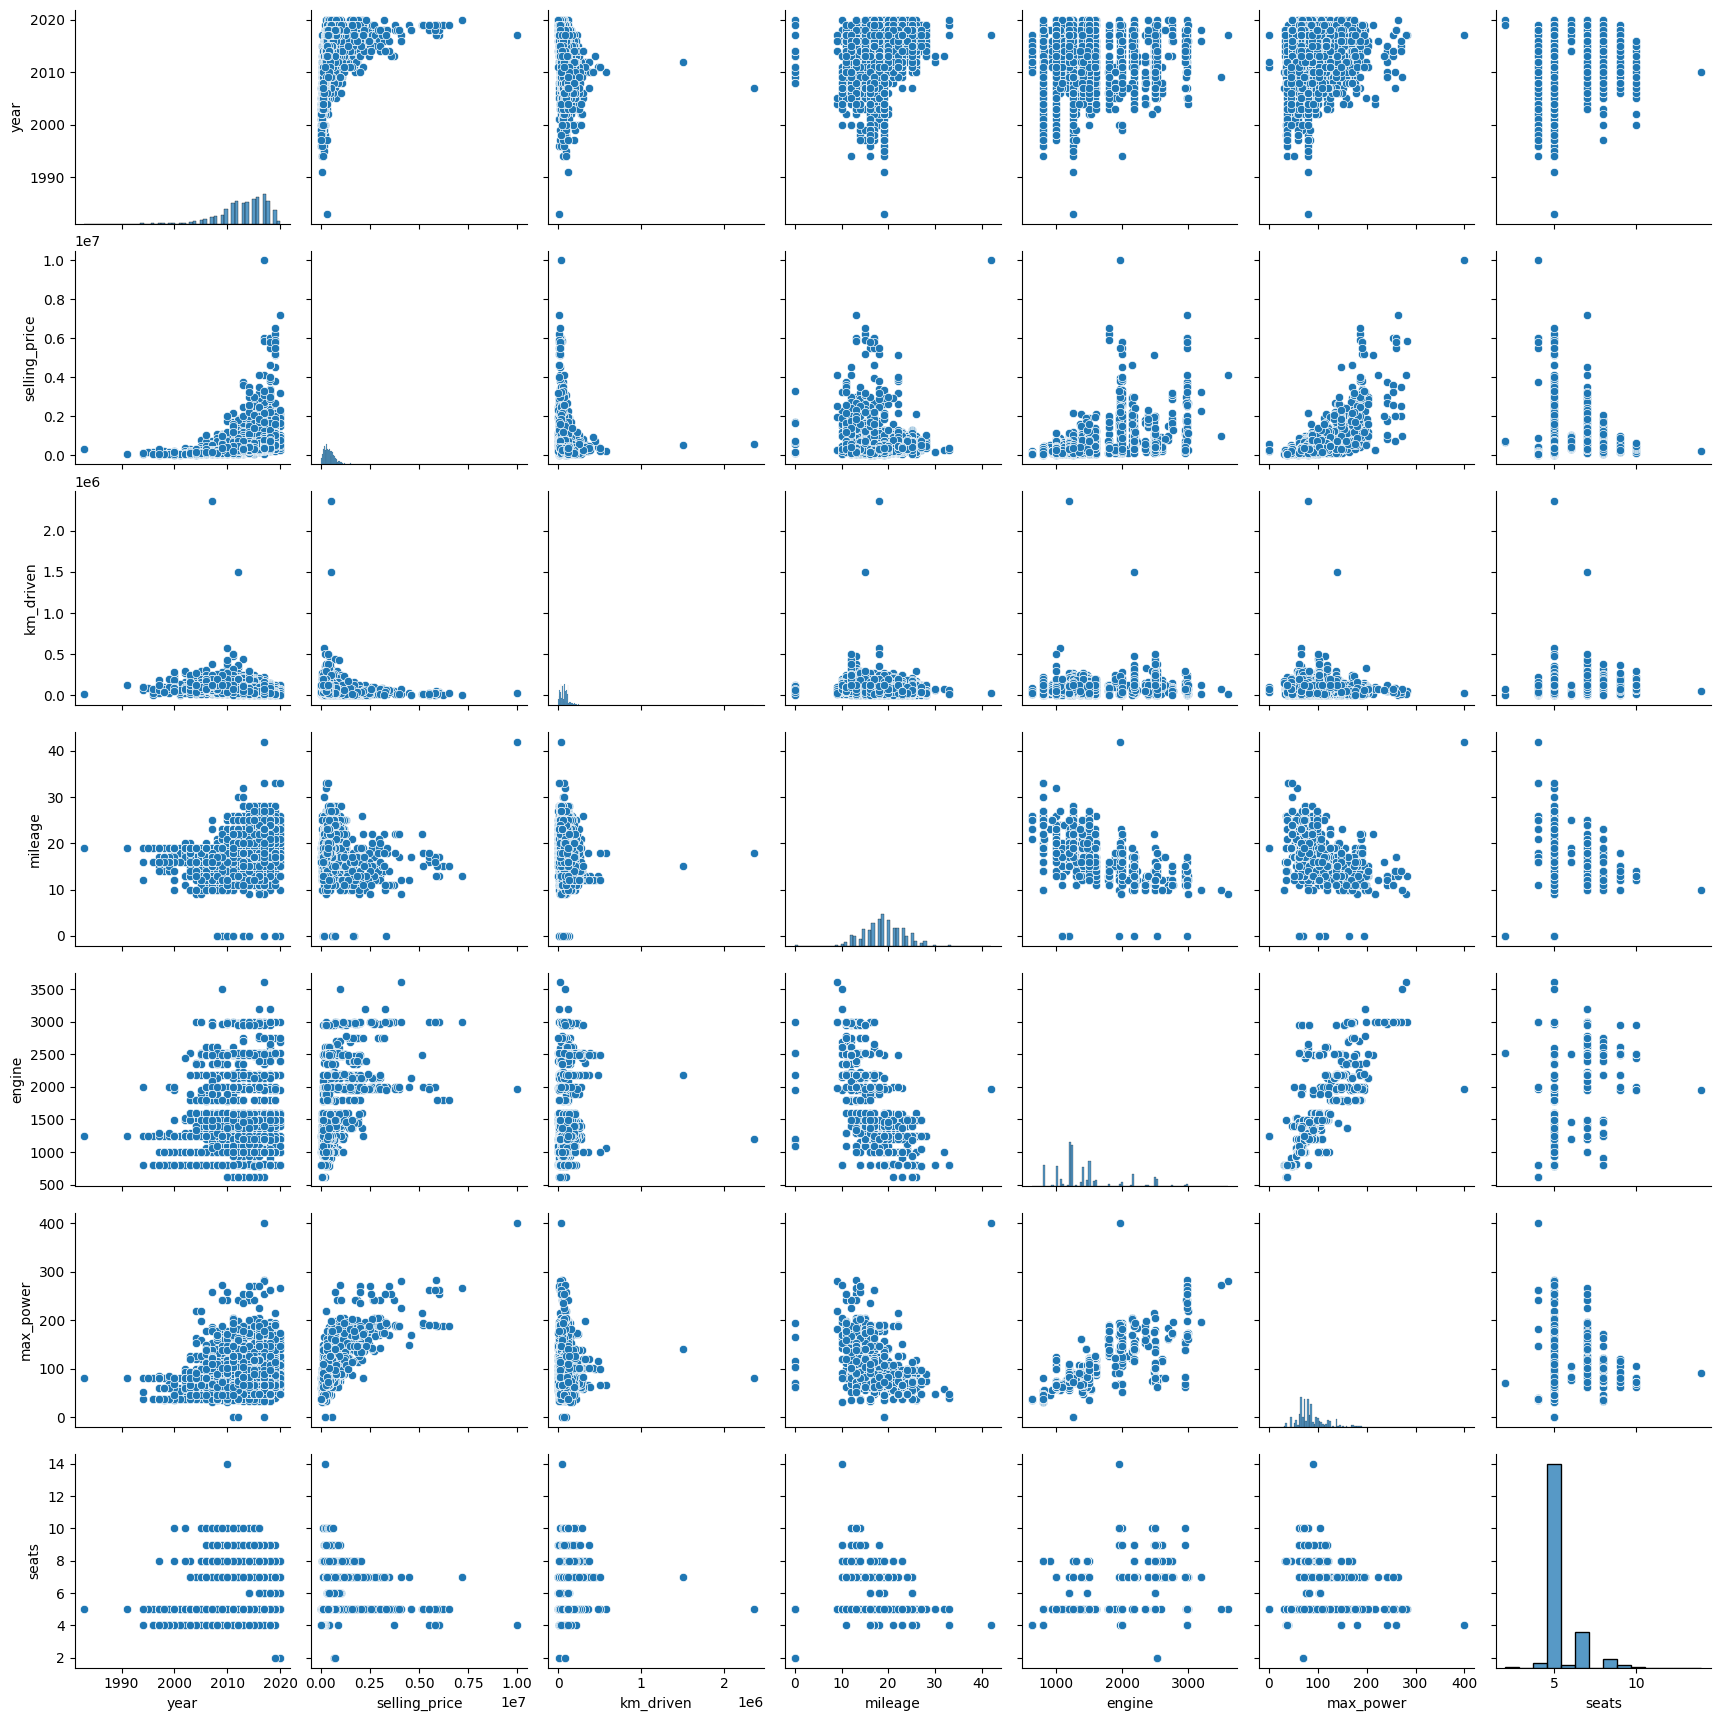

In [27]:
sns.pairplot(df_train[numeric])
plt.show()

Можно увидеть, что существуют прямые корелляции между целевой переменной и year, max_power и engine, обратные c mileage и km_driven.

Между переменными вероятно есть большая зависимость между engine и max_power

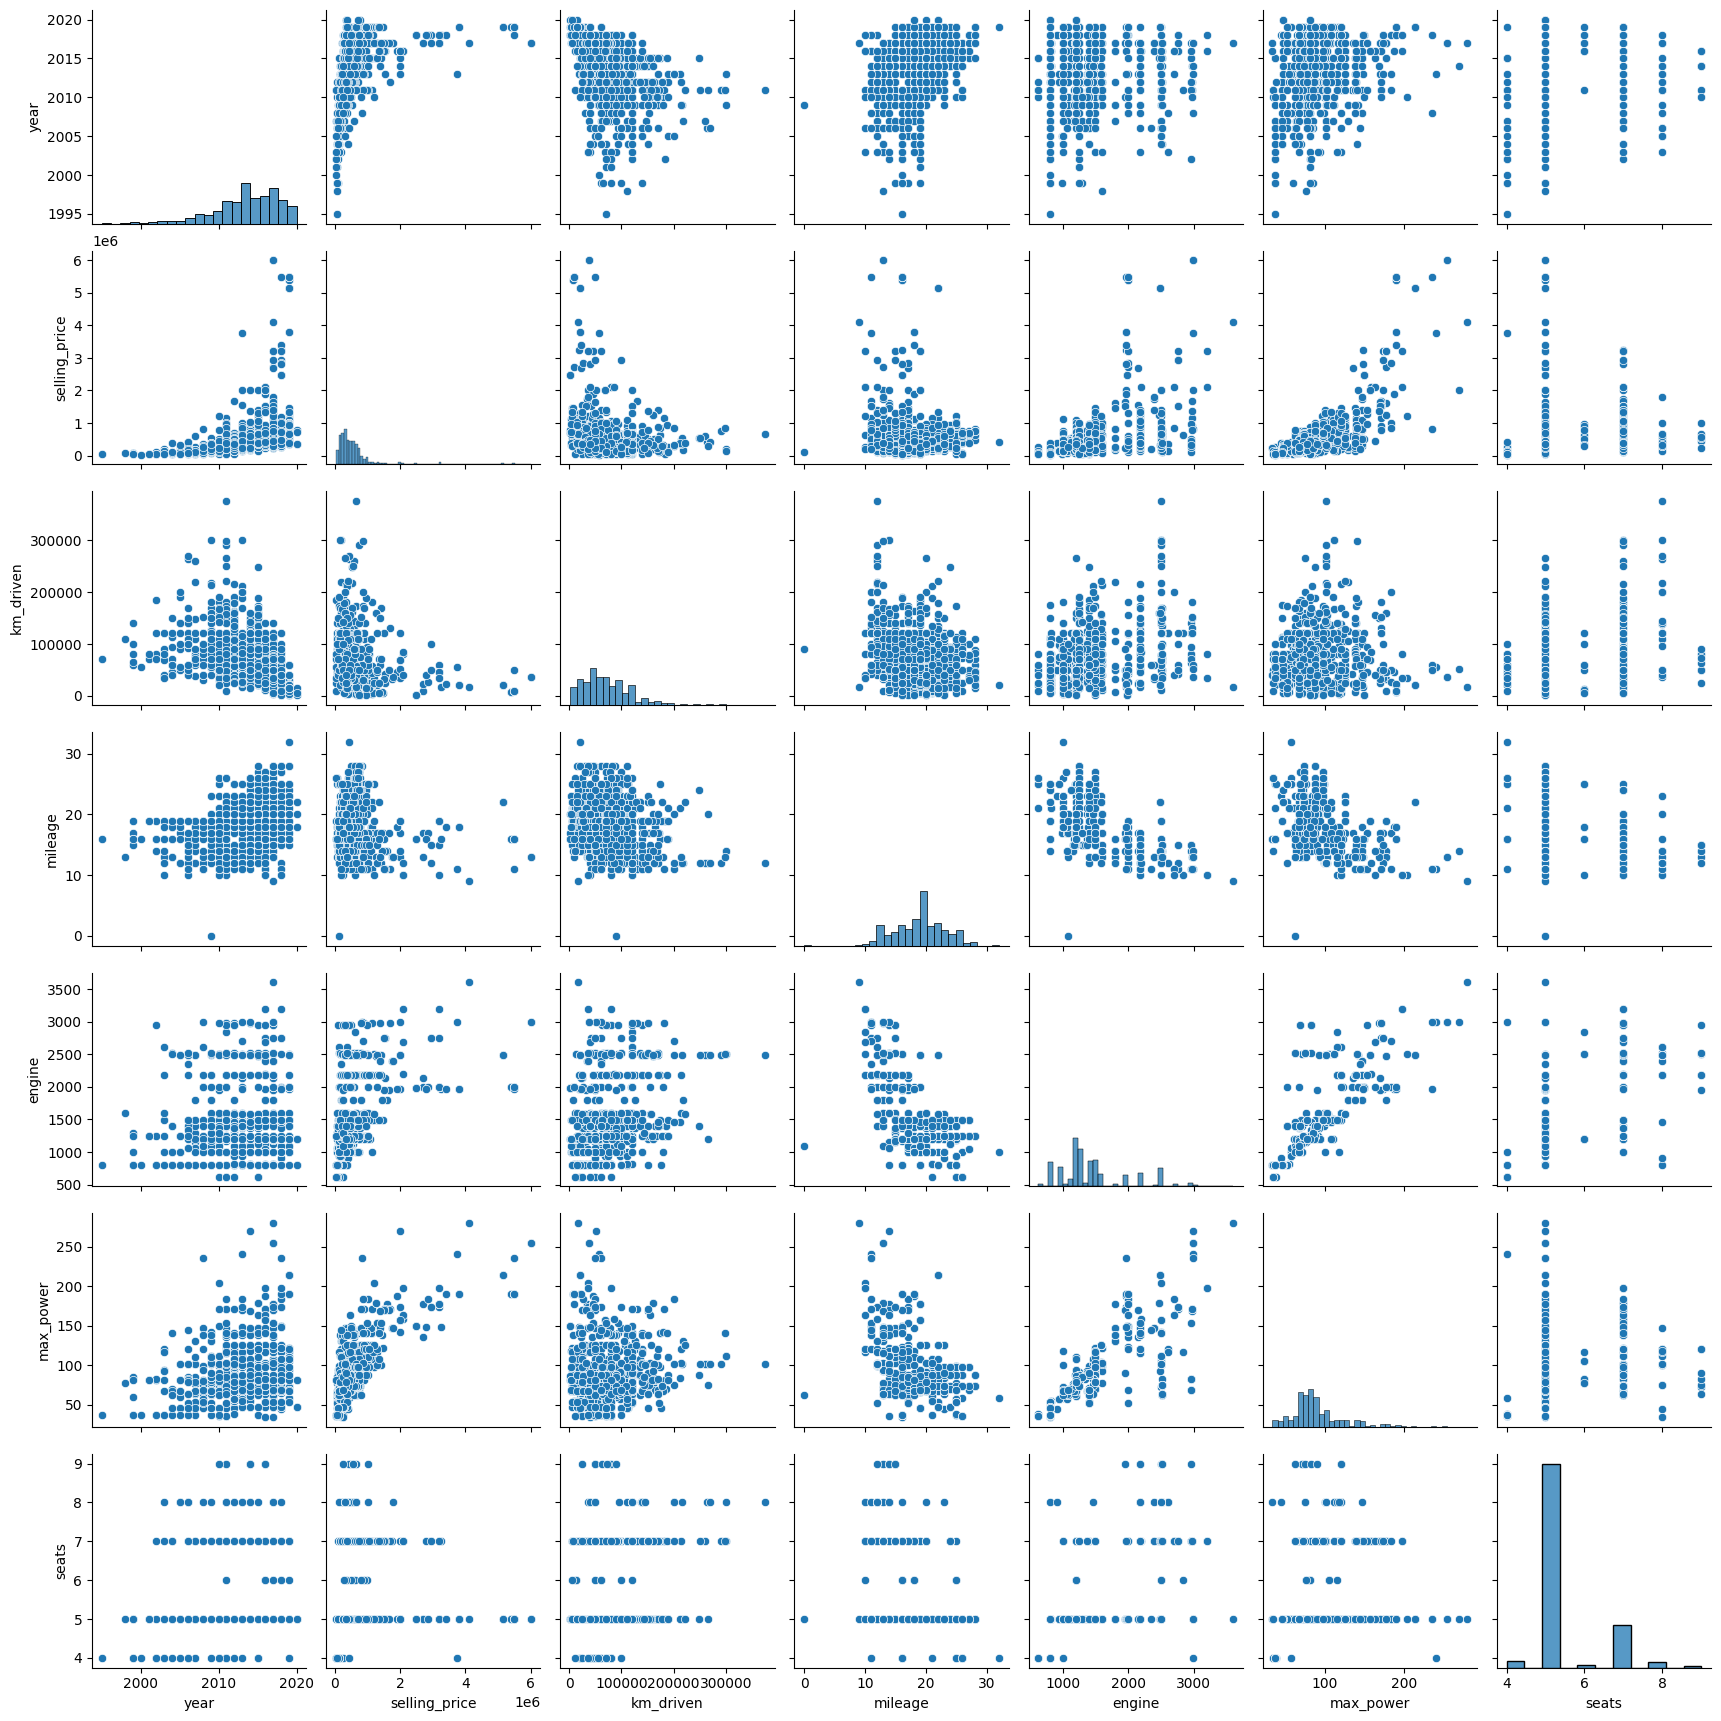

In [28]:
sns.pairplot(df_test[numeric])
plt.show()

В целом распределения между собой очень похожи, только экстремальных значений значительно больше в train (особоенно видно по seats)

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [29]:
correlation = df_train[numeric].corr()

In [30]:
correlation

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.340980  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.101870  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.184259  0.229766   
mileage        0.340980      -0.101870  -0.184259  1.000000 -0.574745   
engine         0.002819       0.447672   0.229766 -0.574745  1.000000   
max_power      0.155518       0.692608   0.025558 -0.366024  0.682608   
seats          0.041178       0.149953   0.192328 -0.457939  0.652172   

               max_power     seats  
year            0.155518  0.041178  
selling_price   0.692608  0.149953  
km_driven       0.025558  0.192328  
mileage        -0.366024 -0.457939  
engine          0.682608  0.652172  
max_power       1.000000  0.245716  
seats           0.245716  1.000000

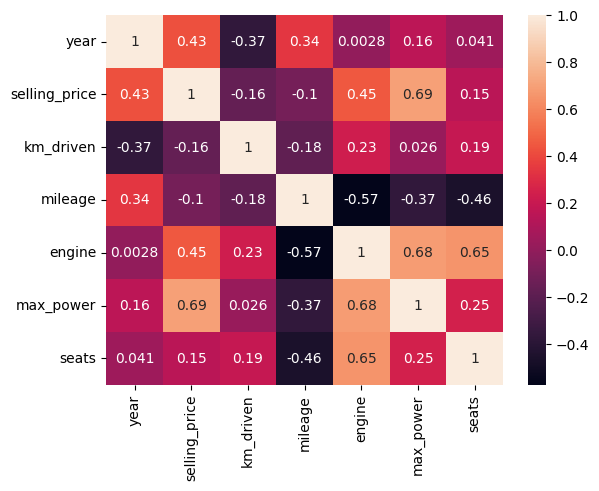

In [31]:
sns.heatmap(correlation,annot=True)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1) наименее скоррелированные признаки - year/engine

2) наибольшая положительная - enigne - max_power и engine - seats

3) да, так как у этих параметров отрицательная корреляция

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

In [32]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [33]:
y_train = df_train["selling_price"]
X_train = df_train[numeric].drop(columns=["selling_price"])

In [34]:
assert X_train.shape == (5840, 6)

In [35]:
y_test = df_test["selling_price"]
X_test = df_test[numeric].drop(columns=["selling_price"])

In [36]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()

def fit_and_estimate(model, X_train, X_test, y_train):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_mse = mean_squared_error(y_train, train_preds)
    train_r2 = r2_score(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    test_r2 = r2_score(y_test, test_preds)
    print(f'Обучающая выборка - MSE: {train_mse}, R2: {train_r2}')
    print(f'Тестовая выборка - MSE: {test_mse}, R2: {test_r2}')

fit_and_estimate(model, X_train, X_test, y_train)


Обучающая выборка - MSE: 116869295903.47508, R2: 0.5922761184948114
Тестовая выборка - MSE: 232931278633.76865, R2: 0.5947813024440669


Модель справляется значительно лучше чем предсказание средним, однако коэффицент детерминации не такой высокий 0.59. Так же квадрат ошибки довольно высокий, однако чтобы судить о погрешности модели лучше посчитать RMSE.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fit_and_estimate(model, X_train_scaled, X_test_scaled, y_train)

Обучающая выборка - MSE: 116869295903.47507, R2: 0.5922761184948115
Тестовая выборка - MSE: 232931278633.76447, R2: 0.5947813024440742


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [39]:
print("Параметры:", X_train.columns,"Беты:", model.coef_)

Параметры: Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'], dtype='object') Беты: [154230.90423306 -43882.97081876  26307.47540837  59728.37904983
 322658.84159073 -23816.36855453]


Наибольшее влияние оказывает Max_power

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso()
fit_and_estimate(lasso, X_train_scaled, X_test_scaled, y_train)

Обучающая выборка - MSE: 116869295913.55316, R2: 0.5922761184596519
Тестовая выборка - MSE: 232931937982.13474, R2: 0.5947801554092517


Качество модели практически идентично предыдущим

In [41]:
print("Беты:", lasso.coef_)

Беты: [154230.71366662 -43881.84512309  26305.60412197  59723.53270491
 322659.7577715  -23813.49861191]


Не занулило. Вероятно, модель посчитала все используемые признаки значимыми при установленном штрафе

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [42]:
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
params = {'alpha': np.logspace(1, 10, 4000)}

grid = GridSearchCV(lasso, params,cv=10)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e+01, 1.00519556e+01, 1.01041812e+01, ...,
       9.89689300e+09, 9.94831292e+09, 1.00000000e+10])})

In [43]:
print(f'Число моделей:',len(grid.cv_results_['params']))
print(f'Лучшие параметры: {grid.best_params_}')
print(f'Лучший score: {grid.best_score_}')
print(f'Беты: {grid.best_estimator_.coef_}')

Число моделей: 4000
Лучшие параметры: {'alpha': 26629.090834174247}
Лучший score: 0.5752257188657389
Беты: [146206.78677888 -15898.38633718      0.              0.
 321852.27537305     -0.        ]


In [44]:
grid_model = fit_and_estimate(Lasso(alpha=grid.best_params_['alpha']), X_train_scaled, X_test_scaled, y_train)

Обучающая выборка - MSE: 119554308189.87984, R2: 0.5829088708970657
Тестовая выборка - MSE: 249804762069.64322, R2: 0.5654273615683676


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [45]:
from sklearn.linear_model import ElasticNet

params = {'alpha': np.logspace(1, 10, 100), 'l1_ratio': np.linspace(0.01, 1, 50)}

elastic = GridSearchCV(ElasticNet(), params, cv=10)
elastic.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e+01, 1.23284674e+01, 1.51991108e+01, 1.87381742e+01,
       2.31012970e+01, 2.84803587e+01, 3.51119173e+01, 4.32876128e+01,
       5.33669923e+01, 6.57933225e+01, 8.11130831e+01, 1.00000000e+02,
       1.23284674e+02, 1.51991108e+02, 1.87381742e+02, 2.31012970e+02,
       2.84803587e+02, 3.51119173e+02, 4.32876128e...
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ])})

In [46]:
print(f'Число моделей:',len(elastic.cv_results_['params']))
print(f'Лучшие параметры: {elastic.best_params_}')
print(f'Лучший score: {elastic.best_score_}')
print(f'Беты: {elastic.best_estimator_.coef_}')

Число моделей: 5000
Лучшие параметры: {'alpha': 10.0, 'l1_ratio': 0.9797959183673469}
Лучший score: 0.5758253859665249
Беты: [138990.63785592 -46080.30039212  17240.52123346  83631.37269064
 253573.14347006 -21232.17072116]


In [63]:
elastic_model = fit_and_estimate(ElasticNet(alpha=elastic.best_params_['alpha'],l1_ratio=elastic.best_params_['l1_ratio']), X_train_scaled, X_test_scaled, y_train)

Обучающая выборка - MSE: 120455684031.95082, R2: 0.5797642258114333
Тестовая выборка - MSE: 258018958434.35712, R2: 0.55113754196191


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [48]:
categories = df_train.select_dtypes(include='object').columns.drop('name')

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [49]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat = pd.concat([pd.DataFrame(X_train_scaled, columns=X_train.columns),df_train[list(categories)]], axis=1)
X_test_cat = pd.concat([pd.DataFrame(X_test_scaled, columns=X_test.columns),df_test[list(categories)]], axis=1)

In [50]:
assert X_train_cat.shape == (5840, 10)

In [51]:
X_train_cat = pd.get_dummies(X_train_cat, columns=categories, drop_first=True)
X_test_cat = pd.get_dummies(X_test_cat, columns=categories, drop_first=True)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha': np.logspace(1, 10, 2000)}

grid_cat = GridSearchCV(Ridge(), params, cv=10, scoring='r2')
grid_cat.fit(X_train_cat, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e+01, 1.01042074e+01, 1.02095007e+01, ...,
       9.79479831e+09, 9.89686734e+09, 1.00000000e+10])},
             scoring='r2')

In [53]:
print(f'Число моделей:',len(grid_cat.cv_results_['params']))
print(f'Лучшие параметры: {grid_cat.best_params_}')
print(f'Лучший score: {grid_cat.best_score_}')
print(f'Беты: {grid_cat.best_estimator_.coef_}')

Число моделей: 2000
Лучшие параметры: {'alpha': 114.29546911811735}
Лучший score: 0.6033810454195765
Беты: [ 137006.96280553  -37589.764449     18052.29242564   46981.87113399
  276220.52918219  -15093.86540322   17124.27647784   24999.72094729
  -39519.27731496 -105165.84161644  -23279.21828829 -247773.51586068
  -24419.16711734  -54382.81372137  112440.63738124  -37572.09294159]


In [54]:
grid_cat_model = fit_and_estimate(Ridge(alpha=grid_cat.best_params_['alpha']), X_train_cat, X_test_cat, y_train)

Обучающая выборка - MSE: 107895614694.5827, R2: 0.6235827513070913
Тестовая выборка - MSE: 211143641386.775, R2: 0.632684146750044


Качество прогноза незначительно повысилась, R2 увеличился, MSE уменшьился

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [57]:
def business_metric(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true) <= 0.1)

def buisness_estimate(model, X_train, X_test, y_train):
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_business_metric = business_metric(y_test, test_preds)
    print(f'Тестовая выборка - business_metric: {test_business_metric}')

print(f'Линейная регрессия')
buisness_estimate(LinearRegression(), X_train_scaled, X_test_scaled, y_train)
print(f'Лассо')
buisness_estimate(Lasso(alpha=grid.best_params_['alpha']), X_train_scaled, X_test_scaled, y_train)
print(f'Эластик')
buisness_estimate(ElasticNet(alpha=elastic.best_params_['alpha'], l1_ratio=elastic.best_params_['l1_ratio']), X_train_scaled, X_test_scaled, y_train)
print(f'Ridge')
buisness_estimate(Ridge(alpha=grid_cat.best_params_['alpha']), X_train_cat, X_test_cat, y_train)

Линейная регрессия
Тестовая выборка - business_metric: 0.22
Лассо
Тестовая выборка - business_metric: 0.239
Эластик
Тестовая выборка - business_metric: 0.247
Ridge
Тестовая выборка - business_metric: 0.224


С точки зрения бизнеса наилучшая модель - ElasticNet

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [61]:
import pickle

In [64]:
with open('car_model_elastic.pkl', 'wb') as f:
    pickle.dump({'model': ElasticNet(alpha=elastic.best_params_['alpha'], l1_ratio=elastic.best_params_['l1_ratio']).fit(X_train_scaled, y_train), 'scaler': scaler}, f)

In [66]:
X_train

year  km_driven  mileage  engine  max_power  seats
0     2014     145500     23.0    1248       74.0      5
1     2014     120000     21.0    1498      103.0      5
2     2010     127000     23.0    1396       90.0      5
3     2007     120000     16.0    1298       88.0      5
4     2017      45000     20.0    1197       81.0      5
...    ...        ...      ...     ...        ...    ...
5835  2008     191000     17.0    1086       62.0      5
5836  2013      50000     18.0     998       67.0      5
5837  2013     110000     18.0    1197       82.0      5
5838  2007     119000     16.0    1493      110.0      5
5839  2009     120000     19.0    1248       73.0      5

[5840 rows x 6 columns]

In [58]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item):
    data = np.array([
        item.year, item.km_driven, item.mileage, item.engine,
        item.max_power, item.seats
    ]).reshape(1, -1)
    data = scaler.transform(data)
    prediction = model.predict(data)
    return {"predicted_price": prediction[0]}

@app.post("/predict_items")
def predict_items(items: Items):
    data = [
        [
            item.year, item.km_driven, item.mileage, item.engine,
            item.max_power, item.seats
        ]
        for item in items.objects
    ]
    data = scaler.transform(data)
    predictions = model.predict(data)
    results = pd.DataFrame(data, columns=[
        "year", "km_driven", "mileage", "engine", "max_power", "seats"
    ])
    results["predicted_price"] = predictions
    results.to_csv("predicted_prices.csv", index=False)

    return {"message": "Predictions saved to 'predicted_prices.csv'"}

ModuleNotFoundError: No module named 'fastapi'

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

